In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
from sqlalchemy import create_engine

# Paramètres pour la connexion à SQL Server
server = 'DIRAR'
database = 'DATA WAREHOUSE'
username = 'sa'
password = 'azerty123'

# Création du moteur SQLAlchemy pour SQL Server
engine = create_engine(
    f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
)

# Charger les tables nécessaires dans des DataFrames pandas
dim_admission = pd.read_sql("SELECT * FROM dim_admission", engine)
dim_patients = pd.read_sql("SELECT * FROM dim_patients", engine)
dim_doctor = pd.read_sql("SELECT * FROM dim_doctor", engine)
dim_reclamation = pd.read_sql("SELECT * FROM dim_reclamation", engine)
dim_temps = pd.read_sql("SELECT * FROM dim_temps", engine)
satisfaction_fact = pd.read_sql("SELECT * FROM satisfaction_fact", engine)

# Affichage de quelques lignes pour vérifier
print(dim_admission.head())
print(dim_patients.head())

   hadm_id admission_type         admission_location        discharge_location
0   100375      EMERGENCY  TRANSFER FROM HOSP/EXTRAM                       SNF
1   100969      EMERGENCY       EMERGENCY ROOM ADMIT              DEAD/EXPIRED
2   101361      EMERGENCY  TRANSFER FROM HOSP/EXTRAM  REHAB/DISTINCT PART HOSP
3   103379      EMERGENCY       EMERGENCY ROOM ADMIT          HOME HEALTH CARE
4   103770      EMERGENCY       EMERGENCY ROOM ADMIT  REHAB/DISTINCT PART HOSP
   subject_id insurance language  religion marital_status  \
0       10006  Medicare           CATHOLIC      SEPARATED   
1       10011   Private           CATHOLIC         SINGLE   
2       10013  Medicare           CATHOLIC                  
3       10017  Medicare           CATHOLIC       DIVORCED   
4       10019  Medicare           CATHOLIC       DIVORCED   

                ethnicity  
0  BLACK/AFRICAN AMERICAN  
1   UNKNOWN/NOT SPECIFIED  
2   UNKNOWN/NOT SPECIFIED  
3                   WHITE  
4                  

In [55]:
# List of your DataFrames
dataframes = {
    'dim_admission': dim_admission,
    'dim_patients': dim_patients,
    'dim_doctor': dim_doctor,
    'dim_reclamation': dim_reclamation,
    'dim_temps': dim_temps,
    'satisfaction_fact': satisfaction_fact
}

for name, df in dataframes.items():
    print(f"\n--- Analysis for DataFrame: {name} ---")
    print("\nShape (Number of rows and columns):")
    print(df.shape)

    print("\nData Types of each column:")
    print(df.dtypes)

    print("\nNumber of missing values per column:")
    print(df.isnull().sum())

    print("\nSummary statistics for numerical columns:")
    print(df.describe())

    # Display unique values for a few key categorical columns (to get a sense of the categories)
    if 'admission_type' in df.columns:
        print("\nUnique values in 'admission_type':")
        print(df['admission_type'].unique())
    if 'admission_location' in df.columns:
        print("\nUnique values in 'admission_location':")
        print(df['admission_location'].unique())
    if 'discharge_location' in df.columns:
        print("\nUnique values in 'discharge_location':")
        print(df['discharge_location'].unique())
    if 'insurance' in df.columns:
        print("\nUnique values in 'insurance':")
        print(df['insurance'].unique())
    if 'language' in df.columns:
        print("\nUnique values in 'language':")
        print(df['language'].unique())
    if 'religion' in df.columns:
        print("\nUnique values in 'religion':")
        print(df['religion'].unique())
    if 'marital_status' in df.columns:
        print("\nUnique values in 'marital_status':")
        print(df['marital_status'].unique())
    if 'ethnicity' in df.columns:
        print("\nUnique values in 'ethnicity':")
        print(df['ethnicity'].unique())
    if 'Specialty' in df.columns:
        print("\nUnique values in 'Specialty' (dim_doctor):")
        print(df['Specialty'].unique())
    if 'Complaint_Type' in df.columns:
        print("\nUnique values in 'Complaint_Type' (dim_reclamation):")
        print(df['Complaint_Type'].unique())
    if 'Status' in df.columns:
        print("\nUnique values in 'Status' (dim_reclamation):")
        print(df['Status'].unique())

    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("-" * 50)


--- Analysis for DataFrame: dim_admission ---

Shape (Number of rows and columns):
(112, 4)

Data Types of each column:
hadm_id                int64
admission_type        object
admission_location    object
discharge_location    object
dtype: object

Number of missing values per column:
hadm_id               0
admission_type        0
admission_location    0
discharge_location    0
dtype: int64

Summary statistics for numerical columns:
             hadm_id
count     112.000000
mean   152573.330357
std     28497.591426
min    100375.000000
25%    128145.500000
50%    157724.000000
75%    174803.500000
max    199395.000000

Unique values in 'admission_type':
['EMERGENCY' 'ELECTIVE' 'URGENT']

Unique values in 'admission_location':
['TRANSFER FROM HOSP/EXTRAM' 'EMERGENCY ROOM ADMIT'
 'PHYS REFERRAL/NORMAL DELI' 'CLINIC REFERRAL/PREMATURE']

Unique values in 'discharge_location':
['SNF' 'DEAD/EXPIRED' 'REHAB/DISTINCT PART HOSP' 'HOME HEALTH CARE' 'HOME'
 'LONG TERM CARE HOSPITAL' 'HOME WI


--- Correlation Analysis for DataFrame: dim_admission ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_patients ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_doctor ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_reclamation ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_temps ---

Correlation Matrix:
          temps_ID     Annee      Mois      Jour
temps_ID  1.000000  0.047671 -0.201804 -0.112588
Annee     0.047671  1.000000 -0.196396  0.213991
Mois     -0.201804 -0.196396  1.000000 -0.009159
Jour     -0.112588  0.213991 -0.009159  1.000000


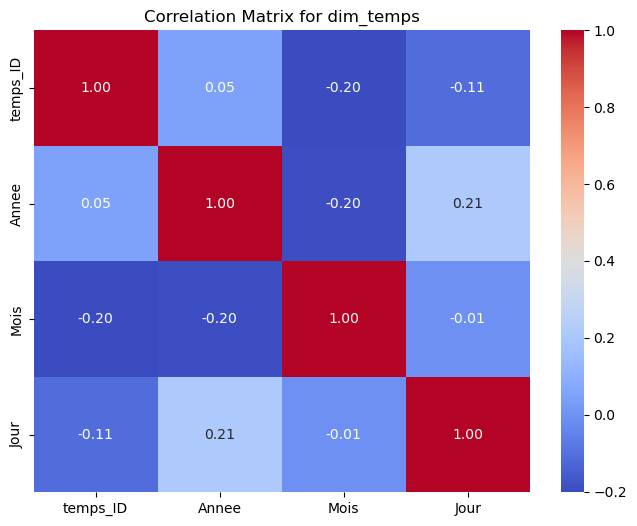

--------------------------------------------------

--- Correlation Analysis for DataFrame: satisfaction_fact ---

Correlation Matrix:
                           hadm_id  Doctor_ID  subject_id  temps_ID  \
hadm_id                   1.000000  -0.061245   -0.269488 -0.263811   
Doctor_ID                -0.061245   1.000000    0.831152  0.839890   
subject_id               -0.269488   0.831152    1.000000  0.979399   
temps_ID                 -0.263811   0.839890    0.979399  1.000000   
Resolution_Duration_Days  0.011968   0.381967    0.490488  0.525126   
Satisfaction_Impact      -0.000212  -0.403977   -0.388900 -0.460742   
complaint_count                NaN        NaN         NaN       NaN   

                          Resolution_Duration_Days  Satisfaction_Impact  \
hadm_id                                   0.011968            -0.000212   
Doctor_ID                                 0.381967            -0.403977   
subject_id                                0.490488            -0.388900

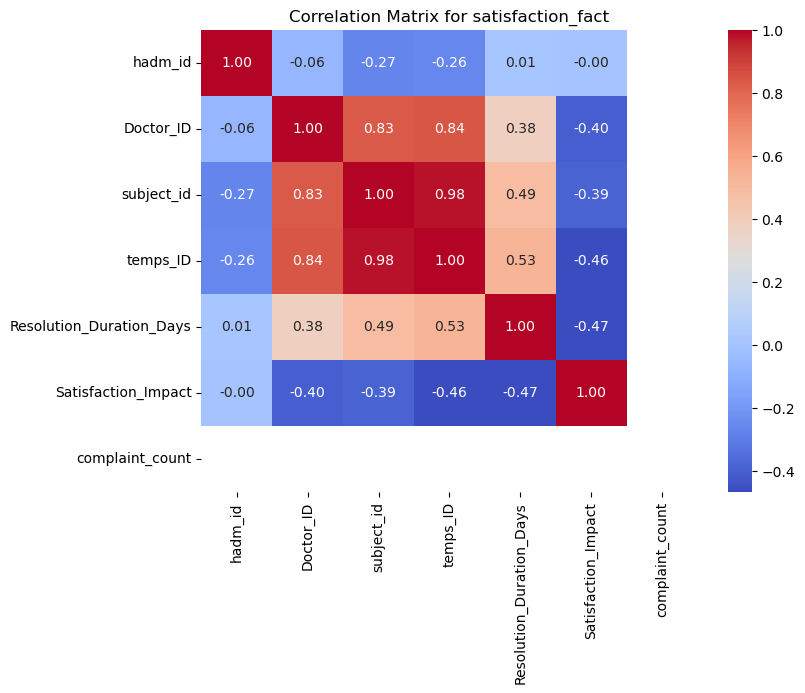

--------------------------------------------------


In [57]:
# List of your DataFrames
dataframes = {
    'dim_admission': dim_admission,
    'dim_patients': dim_patients,
    'dim_doctor': dim_doctor,
    'dim_reclamation': dim_reclamation,
    'dim_temps': dim_temps,
    'satisfaction_fact': satisfaction_fact
}

for name, df in dataframes.items():
    print(f"\n--- Correlation Analysis for DataFrame: {name} ---")

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['number'])

    if numerical_cols.empty or numerical_cols.shape[1] < 2:
        print("Not enough numerical columns to calculate correlation.")
    else:
        # Calculate the correlation matrix
        correlation_matrix = numerical_cols.corr()
        print("\nCorrelation Matrix:")
        print(correlation_matrix)

        # Optional: Visualize the correlation matrix using a heatmap
        import seaborn as sns
        import matplotlib.pyplot as plt

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Matrix for {name}')
        plt.show()

    print("-" * 50)

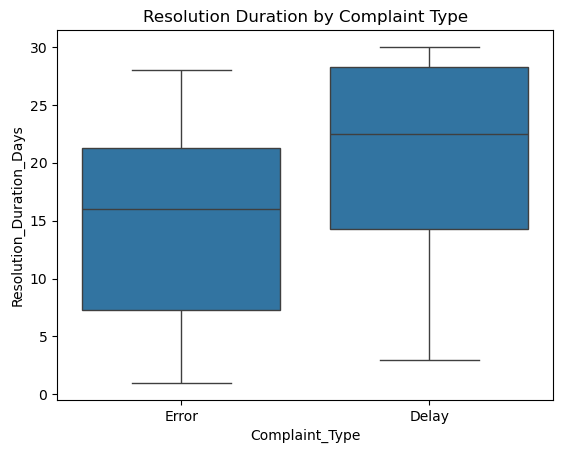

In [11]:
sns.boxplot(x='Complaint_Type', y='Resolution_Duration_Days', data=df_complaint)
plt.title('Resolution Duration by Complaint Type')
plt.show()

In [13]:
# Select the necessary columns
df_satisfaction_prediction = satisfaction_fact[['Satisfaction_Impact', 'Resolution_Duration_Days']].copy()

# Handle missing values
df_satisfaction_prediction.dropna(inplace=True)

# Separate features and target
X_satisfaction_prediction = df_satisfaction_prediction[['Resolution_Duration_Days']]
y_satisfaction_prediction = df_satisfaction_prediction['Satisfaction_Impact']

# It's a good practice to scale numerical features for regression
from sklearn.preprocessing import StandardScaler
scaler_resolution_days = StandardScaler()
X_satisfaction_prediction_scaled = scaler_resolution_days.fit_transform(X_satisfaction_prediction)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_satisfaction_prediction, X_test_satisfaction_prediction, y_train_satisfaction_prediction, y_test_satisfaction_prediction = train_test_split(
    X_satisfaction_prediction_scaled, y_satisfaction_prediction, test_size=0.2, random_state=42
)

In [15]:
from sklearn.linear_model import LinearRegression

model_satisfaction_prediction = LinearRegression()
model_satisfaction_prediction.fit(X_train_satisfaction_prediction, y_train_satisfaction_prediction)

LinearRegression()

In [27]:
# Merge satisfaction_fact with dim_reclamation
merged_df_resolution = pd.merge(satisfaction_fact, dim_reclamation, on='Reclamation_ID', how='inner')

# Select the necessary columns
df_resolution_description = merged_df_resolution[['Resolution_Duration_Days', 'Complaint_Description']].copy()

# Handle missing values
df_resolution_description.dropna(inplace=True)

# Separate features and target
X_resolution_description = df_resolution_description['Complaint_Description']
y_resolution_description = df_resolution_description['Resolution_Duration_Days']

--- Prédiction de la moyenne de Satisfaction Impact par Mois et par Patient ---
Mean Squared Error (MSE): 1.3323011885111573
R² Score: 0.21048818458598084


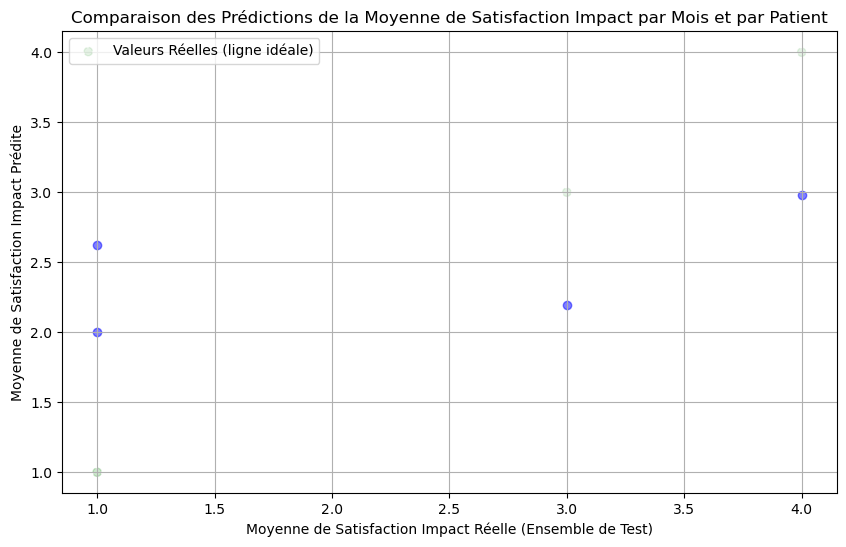

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assurez-vous que vos DataFrames 'satisfaction_fact' et 'dim_temps' sont chargés.

# Fusionner satisfaction_fact avec dim_temps pour obtenir la DateTransaction
merged_satisfaction_temps = pd.merge(satisfaction_fact, dim_temps, on='temps_ID', how='inner')

# Convertir 'DateTransaction' en datetime si ce n'est pas déjà fait
merged_satisfaction_temps['DateTransaction'] = pd.to_datetime(merged_satisfaction_temps['DateTransaction'])

# Extraire l'année et le mois de 'DateTransaction'
merged_satisfaction_temps['Annee'] = merged_satisfaction_temps['DateTransaction'].dt.year
merged_satisfaction_temps['Mois'] = merged_satisfaction_temps['DateTransaction'].dt.month

# Calculer la moyenne de 'Satisfaction_Impact' par mois et par patient
monthly_patient_avg_satisfaction = merged_satisfaction_temps.groupby(['subject_id', 'Annee', 'Mois'])['Satisfaction_Impact'].mean().reset_index()

# Créer les caractéristiques (features) et la cible (target)
# Ici, la cible est la moyenne de la satisfaction par mois et par patient
X = monthly_patient_avg_satisfaction[['subject_id', 'Annee', 'Mois']]  # Caractéristiques (patient, année, mois)
y = monthly_patient_avg_satisfaction['Satisfaction_Impact']  # Cible (moyenne de la satisfaction)

# Convertir 'subject_id', 'Annee', 'Mois' en variables catégorielles pour les utiliser dans le modèle linéaire
X = pd.get_dummies(X, columns=['subject_id', 'Annee', 'Mois'], drop_first=True)

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("--- Prédiction de la moyenne de Satisfaction Impact par Mois et par Patient ---")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Optionnel : Visualiser les prédictions vs les valeurs réelles (peut être difficile à interpréter avec de nombreux patients)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.scatter(y_test, y_test, color='green', alpha=0.1, linestyle='--', label='Valeurs Réelles (ligne idéale)')
plt.xlabel("Moyenne de Satisfaction Impact Réelle (Ensemble de Test)")
plt.ylabel("Moyenne de Satisfaction Impact Prédite")
plt.title("Comparaison des Prédictions de la Moyenne de Satisfaction Impact par Mois et par Patient")
plt.legend()
plt.grid(True)
plt.show()